## Assignments for Week-03
因为最近开始写毕业论文了...所以用英文注释和回答来多习惯一下...

### 1. Re-code the titanic machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
        Ans:change_directions = [
            (+1, -1), 
            (+1, +1),
            (-1, +1),
            (-1, -1) ] 
            direction = random.choice(change_directions)
            k_delta_direction, b_delta_direction = direction
            k_delta = k_delta_direction * step()
            b_delta = b_delta_direction * step()
        
###### 2.Supervised Direction to get optimal *k* and *b*
        Ans: #Above code append below code.
             if error_rate < min_error_rate:
                 min_error_rate = error_rate
                 best_k, best_b = new_k, new_b
                 best_k, best_b = k_hat, b_hat
                
###### 3.Gradient Descent to get optimal *k* and *b*
        Ans: def derivate_k(y, yhat, x):
                abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
                return np.mean([a * -x_i for a, x_i in zip(abs_values, x)])

            def derivate_b(y, yhat):
                abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
                return np.mean([a * -1 for a in abs_values])
            learing_rate = 1e-1
            k_delta = -1 * learing_rate * derivate_k(sub_fare, func(sub_age, k_hat, b_hat), sub_age)
            b_delta = -1 * learing_rate * derivate_b(sub_fare, func(sub_age, k_hat, b_hat))
       

## 2. Answer following questions:


###### 1. Why we need machine learning methods instead of creating a complicated formula?


Ans: Since the complexity of the problem increase, we cannot easily create the formula to describe the problem. Fitting the formula to the problem is also too difficult to finish. Thus, we need to use the machine to help us fit the complicate formula.

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

   Ans: The performance of the formula is totally decide by the random function. It could work well and it could work bad.

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans: The second method can supervise the formula changing to the better direction. If the formula doesn't become better, it just ignore this round. The disadvantages of the 2nd method is that it is still decide by the random function. It will be very slow to fit the formula.

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans: The gradient of a point shows the biggest change direction of the function at that point. We use the gradient to change the function parameter to get the fastest fitting speed.

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans: The gradient of a point shows the biggest change direction of the function at that point. We want to go to the smallest point of the loss function in very fast speed, so we change the parameter of the fomula according to the gradient.

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans: It use the gradient descent to go to the smallest point of the loss function in fastest speed.

###### 7. Using the simple words to describe: What's the machine leanring.

Ans: Using machines' power to fit the formula which can describe the real world problem.

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-April-20

>Submit: Submit the source code and result to github. 



#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485
        
> b.	You may need @package requests page to get the response via url

> c.	You may need save the page source to file system.

In [1]:
url='https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'
import urllib.request
response = urllib.request.urlopen(url)
html_baike = response.read().decode('utf-8')
webText = open("./baikesubway.txt",'w',encoding='gb18030')
webText.write(html_baike)


376339

> d.	The target of this step is get station information of all the subway lines; 

> e.	You may need install @package beautiful soup  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

In [2]:
import re 
"""
匹配‘北京地铁___线’
"""
subway_line=re.compile('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81.{1,50}%BA%BF')
subway_line_all=subway_line.findall(str(html_baike))


> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better?

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> I am not really get trouble with the regular expression and the web crawler. So I choose to get the source from official website: http://www.bjsubway.com/station/zjgls/#

In [3]:
"""
I am not really get trouble with the regular expression and the web crawler.
So I choose to get the source from official website: http://www.bjsubway.com/station/zjgls/#
"""

url='http://www.bjsubway.com/station/zjgls/#'
import urllib.request
response = urllib.request.urlopen(url)
html = response.read().decode('gb18030')
webText = open("./subway.txt",'w',encoding='gb18030')
webText.write(html)


62787

> b.	the Regular Expression you may need to process the text information.

In [4]:
"""
Create the oneway information of the subway.
"""

import re 
from bs4 import BeautifulSoup

"""
<th>安河桥北——北宫门</th>
<td>1363</td>
"""
def get_station_info(textStream):
    subway_pattern = re.compile('<th>.{0,100}</th>\r\n\s+<td.*>\d{0,8}</td>')
    replace_pattern = re.compile('[^(<.*th>|\r|\n|<td>|</td>)]')

    #replace_pattern = re.compile('<.*th>')
    temp_findth=subway_pattern.findall(str(textStream))
       
    if temp_findth:
        temp_findth[0]=temp_findth[0].replace("<td width=\"146\">",'<td>')
    subway_list=list()
    for i in temp_findth:
        i=''.join(re.findall(replace_pattern,str(i)))
        i=i.replace('T3','3号')
        i=i.replace('T2','2号')
        i=i.replace('——',' ')
        i=i.replace('    ',' ')
        i=i.replace('   ',' ')
        i=i.replace('  ',' ')
        subway_list.append(i)

    station_list=list()
    for i in subway_list:
        temp=i.split(' ')
        station_list.append(temp)
    return station_list

station_list=get_station_info(html)

print(station_list[:10])

   


[['苹果园', '古城', '2606'], ['古城', '八角游乐园', '1921'], ['八角游乐园', '八宝山', '1953'], ['八宝山', '玉泉路', '1479'], ['玉泉路', '五棵松', '1810'], ['五棵松', '万寿路', '1778'], ['万寿路', '公主坟', '1313'], ['公主坟', '军事博物馆', '1172'], ['军事博物馆', '木樨地', '1166'], ['木樨地', '南礼士路', '1291']]


> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes.

> e.	You may need the defaultdict, set data structures to implement this procedure. 

d:\anaconda3\envs\aicourse\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


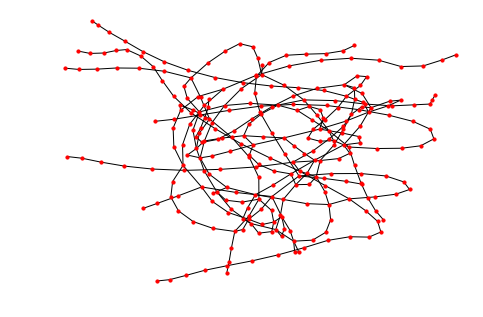

In [5]:
"""Using the one-way information above to create the undirected graph of the subway."""

import networkx as nx
%matplotlib inline

connection_graph={}
for i in station_list:
    if i[0] in connection_graph and i[1] in connection_graph:
        connection_graph[i[0]].append(i[1])
        connection_graph[i[1]].append(i[0])
        
    elif i[0] in connection_graph and not i[1] in connection_graph:
        connection_graph[i[1]]=[i[0]]
        connection_graph[i[0]].append(i[1])
    elif i[1] in connection_graph and not i[0] in connection_graph:
        connection_graph[i[0]]=[i[1]]
        connection_graph[i[1]].append(i[0])
    else:
        connection_graph[i[0]]=[i[1]]
        connection_graph[i[1]]=[i[0]]

#print(connection_graph.items())
g = nx.Graph(connection_graph)
nx.draw(g,with_label=True,node_size=10)



##### 3. Build the search agent

> a.	Build the search agent based on the graph we build.

> b.	As much as you can to use the already implemented search agent. You just need to define the is_goal, get_successor, strategy three functions. 

In [6]:
def is_goal(next_station,destination):
    if next_station==destination: 
        return True
    else:
        return False

def get_successor(froniter):
    successors=connection_graph[froniter]
    return successors

def Search_agent(start,destination,connection_graph,strategy):
    
    pathes=[[start]]
    result=list()
    #print(pathes)
    seen=set()
    if strategy=='bfs':
        strategy=0
    else:
        strategy=-1
    while pathes:
        #print(pathes)
        path=pathes.pop(strategy)        
        froniter=path[-1]
        
        try:
            get_successor(froniter)
            successors=get_successor(froniter)
        except KeyError:
            print("Not such station, please try another.")
            return ''
        
        for s in successors:

            if s in seen:
                continue
            if is_goal(s,destination): 
                path.append(s)
                result.append(path)
                return path
            else:
                pathes.append(path+[s])

        pathes=sorted(pathes,key=len)
        seen.add(froniter)
    return result

#print(Search_agent('五棵松','北沙滩',connection_graph,'bfs'))
#print(Search_agent('五棵松','北沙滩',connection_graph,'dfs'))
bfs_result=Search_agent('天宫院','昌平西山口',connection_graph,'bfs')
print('BFS: '+str(len(bfs_result))+'站  '+'->'.join(bfs_result))
print('\n')
dfs_result=Search_agent('天宫院','昌平西山口',connection_graph,'dfs')
print('DFS: '+str(len(dfs_result))+'站  '+'->'.join(dfs_result))

BFS: 39站  天宫院->生物医药基地->义和庄->黄村火车站->黄村西大街->清源路->枣园->高米店南->高米店北->西红门->新宫->公益西桥->角门西->马家堡->北京南站->陶然亭->菜市口->宣武门->长椿街->复兴门->阜成门->车公庄->西直门->大钟寺->知春路->五道口->上地->西二旗->生命科学园->朱辛庄->巩华城->沙河->沙河高教园->南邵->北邵洼->昌平东关->昌平->十三陵景区->昌平西山口


DFS: 47站  天宫院->生物医药基地->义和庄->黄村火车站->黄村西大街->清源路->枣园->高米店南->高米店北->西红门->新宫->公益西桥->角门西->草桥->纪家庙->首经贸->丰台站->泥洼->西局->七里庄->六里桥->莲花桥->公主坟->西钓鱼台->慈寿寺->车道沟->长春桥->火器营->巴沟->苏州街->海淀黄庄->知春里->知春路->五道口->上地->西二旗->生命科学园->朱辛庄->巩华城->沙河->沙河高教园->南邵->北邵洼->昌平东关->昌平->十三陵景区->昌平西山口


##### 4.	Create different policies for transfer system.

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

In [7]:
"""
Shortest Path Priority
Find out all of the path, and compare them to give out the shortest one.
"""

def find_distance(first,second):
    for items in station_list:
        if items[0]==first and items[1]==second:
            return items[2]
        if items[0]==second and items[1]==first:
            return items[2]

def Shortest_Path_Priority(start,destination,connection_graph):
    pathes=[[start]]
    result=list()
    best_result=list()
    #print(pathes)
    seen=set()
    
    while pathes:
        #print(pathes)
        path=pathes.pop(0)        
        froniter=path[-1]
        
        try:
            get_successor(froniter)
            successors=get_successor(froniter)
        except KeyError:
            print("Not such station, please try another.")
            return ''
        
        for s in successors:

            if s in seen:
                continue
            if is_goal(s,destination): 
                path.append(s)
                result.append(path)
            else:
                pathes.append(path+[s])

        pathes=sorted(pathes,key=len)
        seen.add(froniter)
    smallest_distance=1000000000
    for path in result:
        i=len(path)
        distance = 0        
        for j in range(0,i-1):
            distance+=int(find_distance(path[j],path[j+1]))
        
        if smallest_distance>distance:
            smallest_distance=distance
            best_result=path 
        
        print(path)
        print('Total:{} km'.format(distance/1000))
    
    return best_result,smallest_distance/1000

SPP_result,distan=Shortest_Path_Priority('复兴门','雍和宫',connection_graph)
print('\nSPP: '+str(len(SPP_result))+'站 '+'距离：'+str(distan)+'km  '+'->'.join(SPP_result))

['复兴门', '阜成门', '车公庄', '西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫']
Total:9.397 km
['复兴门', '阜成门', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '张自忠路', '北新桥', '雍和宫']
Total:11.515 km
['复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '朝阳门', '东四十条', '东直门', '雍和宫']
Total:12.43 km
['复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '灯市口', '东四', '张自忠路', '北新桥', '雍和宫']
Total:9.824 km
['复兴门', '西单', '灵境胡同', '西四', '平安里', '北海北', '南锣鼓巷', '东四', '张自忠路', '北新桥', '雍和宫']
Total:11.85 km
['复兴门', '阜成门', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东四十条', '东直门', '雍和宫']
Total:14.32 km
['复兴门', '阜成门', '车公庄', '西直门', '积水潭', '鼓楼大街', '安德里北街', '安华桥', '北土城', '安贞门', '惠新西街南口', '和平西桥', '和平里北街', '雍和宫']
Total:15.978 km

SPP: 8站 距离：9.397km  复兴门->阜成门->车公庄->西直门->积水潭->鼓楼大街->安定门->雍和宫


In [8]:
"""
Minimum Transfer Priority
When we are going to find the way from a station to another station, we need to found out the line they are belong to. 
"""

def find_distance(first,second):
    for items in station_list:
        if items[0]==first and items[1]==second:
            return items[2]
        if items[0]==second and items[1]==first:
            return items[2]

def Shortest_Path_Priority(start,destination,connection_graph):
    pathes=[[start]]
    result=list()
    best_result=list()
    #print(pathes)
    seen=set()
    
    while pathes:
        #print(pathes)
        path=pathes.pop(0)        
        froniter=path[-1]
        
        try:
            get_successor(froniter)
            successors=get_successor(froniter)
        except KeyError:
            print("Not such station, please try another.")
            return ''
        
        for s in successors:

            if s in seen:
                continue
            if is_goal(s,destination): 
                path.append(s)
                result.append(path)
            else:
                pathes.append(path+[s])

        pathes=sorted(pathes,key=len)
        seen.add(froniter)
    smallest_distance=1000000000
    for path in result:
        i=len(path)
        distance = 0        
        for j in range(0,i-1):
            distance+=int(find_distance(path[j],path[j+1]))
        
        if smallest_distance>distance:
            smallest_distance=distance
            best_result=path 
        
        print(path)
        print('Total:{} km'.format(distance/1000))
    
    return best_result,smallest_distance/1000

SPP_result,distan=Shortest_Path_Priority('复兴门','雍和宫',connection_graph)
print('\nSPP: '+str(len(SPP_result))+'站 '+'距离：'+str(distan)+'km  '+'->'.join(SPP_result))

['复兴门', '阜成门', '车公庄', '西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫']
Total:9.397 km
['复兴门', '阜成门', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '张自忠路', '北新桥', '雍和宫']
Total:11.515 km
['复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '朝阳门', '东四十条', '东直门', '雍和宫']
Total:12.43 km
['复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '灯市口', '东四', '张自忠路', '北新桥', '雍和宫']
Total:9.824 km
['复兴门', '西单', '灵境胡同', '西四', '平安里', '北海北', '南锣鼓巷', '东四', '张自忠路', '北新桥', '雍和宫']
Total:11.85 km
['复兴门', '阜成门', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东四十条', '东直门', '雍和宫']
Total:14.32 km
['复兴门', '阜成门', '车公庄', '西直门', '积水潭', '鼓楼大街', '安德里北街', '安华桥', '北土城', '安贞门', '惠新西街南口', '和平西桥', '和平里北街', '雍和宫']
Total:15.978 km

SPP: 8站 距离：9.397km  复兴门->阜成门->车公庄->西直门->积水潭->鼓楼大街->安定门->雍和宫


##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因

BFS基本相同，在换乘选择上明显有问题。
